## $\alpha_{em}$ constraints analysis

In [1]:
import pandas as pd

paper1 = pd.read_csv('alpha_constraints.txt', sep='\t', skiprows=lambda x: x>13)

paper2 = pd.read_csv('alpha_constraints.txt', sep='\t', skiprows=lambda x: x!=15 and x!=14)

paper3 = pd.read_csv('alpha_constraints.txt', sep='\t', skiprows=lambda x: x<17 or x>23)

paper4 = pd.read_csv('alpha_constraints.txt', sep='\t', skiprows=lambda x: x<24 or x>31)

CMB_BBN = pd.read_csv('alpha_constraints.txt', sep='\t', skiprows=lambda x: x<32)

In [2]:
paper1

,z_abs,da/a,stat,sist
0,1.072,-1.35,6.71,2.51
1,1.072,17.07,9.00,2.41
2,2.309,-0.65,6.46,2.26
3,2.309,-0.20,12.44,3.51
4,1.371,-8.45,5.69,4.64
5,1.023,3.54,8.54,2.38
6,1.342,3.05,3.30,2.13
7,1.342,5.67,4.19,2.16
8,1.622,-1.70,9.80,2.47
9,1.305,-4.54,8.08,3.13


In [3]:
paper2

,z_abs,da/a,stat,sist
0,1.1508,-1.42,0.55,0.65


In [4]:
c = 3.*pow(10,5)

paper3['z_abs']=(paper3['z[CII]']+paper3['z[CO]'])*0.5
paper3['da/a'] = paper3['dV']*0.5*pow(10,6)/c
paper3['err'] = paper3['Verr']*0.5*pow(10,6)/c
paper3

,z[CII],CIIerr,z[CO],COerr,dV,Verr,z_abs,da/a,err
0,5.7787,1,5.7794,8,31,35,5.77905,51.666667,58.333333
1,6.0031,2,6.0025,7,-30,30,6.00280,-50.000000,50.000000
2,6.0391,1,6.0379,22,-50,90,6.03850,-83.333333,150.000000
3,6.1330,7,6.1321,12,-40,60,6.13255,-66.666667,100.000000
4,6.4189,3,6.4190,5,4,12,6.41895,6.666667,20.000000


In [5]:
paper4

,z_abs,da/a,stat,sist
0,0.576,-9.12,39.80,3.64
1,0.729,0.73,6.17,1.77
2,1.048,5.47,18.26,4.02
3,1.325,2.60,3.45,2.38
4,1.343,8.36,11.82,2.84
5,1.738,12.70,16.13,1.47


In [6]:
CMB_BBN

,z,da/a,err
0,1100.0,-700.0,2500.0
1,400000000.0,2.1,1.8


In [7]:
-700-2500, -700+2500

(-3200, 1800)

In [8]:
1800-2500

-700

In [9]:
alpha_data = pd.DataFrame(columns=['z','da/a','err','proc'])
for idx in range(len(paper1['z_abs'])): 
    alpha_data.loc[len(alpha_data)]={'z':paper1['z_abs'][idx],
                                     'da/a':paper1['da/a'][idx],
                                     'err':pow(pow(paper1['stat'][idx],2)+pow(paper1['sist'][idx],2),0.5),
                                     'proc':1}
for idx in range(len(paper2['z_abs'])): 
    alpha_data.loc[len(alpha_data)]={'z':paper2['z_abs'][idx],
                                     'da/a':paper2['da/a'][idx],
                                     'err':pow(pow(paper2['stat'][idx],2)+pow(paper2['sist'][idx],2),0.5),
                                     'proc':2}
for idx in range(len(paper3['z_abs'])): 
    alpha_data.loc[len(alpha_data)]={'z':paper3['z_abs'][idx],
                                     'da/a':paper3['da/a'][idx],
                                     'err':paper3['err'][idx],
                                     'proc':3}
for idx in range(len(paper4['z_abs'])): 
    alpha_data.loc[len(alpha_data)]={'z':paper4['z_abs'][idx],
                                     'da/a':paper4['da/a'][idx],
                                     'err':pow(pow(paper4['stat'][idx],2)+pow(paper4['sist'][idx],2),0.5),
                                     'proc':4}
for idx in range(len(CMB_BBN['z'])): 
    alpha_data.loc[len(alpha_data)]={'z':CMB_BBN['z'][idx],
                                     'da/a':CMB_BBN['da/a'][idx],
                                     'err':CMB_BBN['err'][idx],
                                     'proc':5+idx}
    
alpha_data.loc[len(alpha_data)]={'z':0.14,
                                 'da/a':0.,
                                 'err':pow(10,-7+6),
                                 'proc':7}

alpha_data.loc[len(alpha_data)]={'z':0.,
                                 'da/a':0,
                                 'err':pow(10,-15),
                                 'proc':8}

alpha_data.to_csv('alpha_data.txt', sep='\t', index=False)
alpha_data

,z,da/a,err,proc
0,1.072000e+00,-1.350000,7.164091e+00,1
1,1.072000e+00,17.070000,9.317086e+00,1
2,2.309000e+00,-0.650000,6.843917e+00,1
3,2.309000e+00,-0.200000,1.292570e+01,1
4,1.371000e+00,-8.450000,7.342050e+00,1
5,1.023000e+00,3.540000,8.865439e+00,1
6,1.342000e+00,3.050000,3.927709e+00,1
7,1.342000e+00,5.670000,4.713990e+00,1
8,1.622000e+00,-1.700000,1.010648e+01,1
9,1.305000e+00,-4.540000,8.665062e+00,1


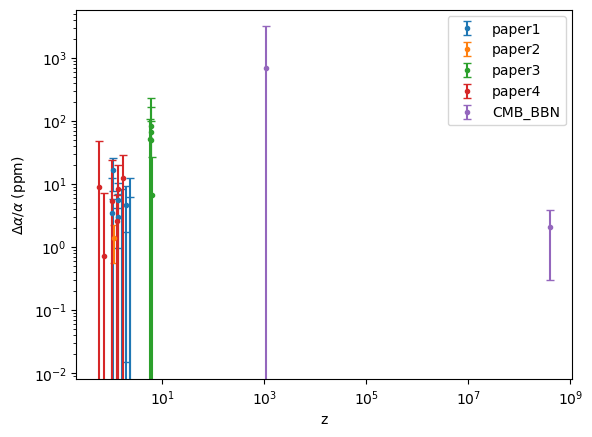

In [10]:
import matplotlib.pyplot as plt

plt.errorbar(paper1['z_abs'], paper1['da/a'],
             yerr=pow(pow(paper1['stat'],2)+pow(paper1['sist'],2),0.5),
             fmt='.',capsize=3,label='paper1')
plt.errorbar(paper2['z_abs'], abs(paper2['da/a']),
             pow(pow(paper2['stat'],2)+pow(paper2['sist'],2),0.5),
             fmt='.',capsize=3,label='paper2')
plt.errorbar(paper3['z_abs'], abs(paper3['da/a']),
             yerr=paper3['err'],
             fmt='.',capsize=3,label='paper3')
plt.errorbar(paper4['z_abs'], abs(paper4['da/a']),
             yerr=pow(pow(paper4['stat'],2)+pow(paper4['sist'],2),0.5),
             fmt='.',capsize=3,label='paper4')
plt.errorbar(CMB_BBN['z'], abs(CMB_BBN['da/a']),
             yerr=CMB_BBN['err'],
             fmt='.',capsize=3,label='CMB_BBN')
plt.xlabel('z')
plt.ylabel('$\Delta\\alpha/\\alpha$ (ppm)')
plt.loglog()
#plt.ylim(pow(10,-10),pow(10,10))
#plt.xlim(0,10)
#plt.ylim(-100,300)
plt.legend()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Obtaining scale parameter vector
var_a = []
step_a = []
a0 = pow(10.,-6)
var_a.append(a0)
while a0<=1.:
    a1 = a0*(1. + 1./10000.)
    var_a.append(a1)
    step_a.append(a0/10000.)
    a0 = a1
# Only values that fulfill a<1.
var_a = np.array(var_a[:-1])
var_z = 1/var_a -1 # redshift list

print(min(var_a),max(var_a))

1e-06 0.999998678085615


In [12]:
from scipy.integrate import solve_ivp

# Parameters
c = 299792.458 #km/s
w_r = 2.469*10**(-5) #Amendola pag 15
z_star = 1089.92
alpha_em = 0.0072973525693

# Best parameters from 
M = -19.394019 # SN absolute magnitude
w_m = 0.141474
k = 38319.078247
alpha = 0.012261
tau = 8.831251e-07

# Solving the differential equation sistem
def fun(a,y):
    H = np.sqrt(np.abs((k*pow(y[0],-alpha)+1.2*pow(10.,5)*
                        (w_m*pow(a,-3)+w_r*pow(a,-4)))/(12-pow(a*y[1],2))))
    dH = -(3./(2*a*H))*(pow(a*H*y[1],2)/6. + pow(10.,4)*
                        (w_m*pow(a,-3)+(4./3.)*w_r*pow(a,-4)))
    f = np.zeros(2,dtype=np.float64)
    f[0]=y[1]
    f[1]=-(4./a + dH/H)*y[1] + (alpha*0.5*k*pow(y[0],-(alpha+1)))/pow(a*H,2)
    return f

def RK4(a,h,yin):
    """
    Given the point a, the step, and the value of y in a,
    calculates the value of y in a+h
    """
    #global control
    
    k1 = fun(a,yin)
    k2 = fun(a+h/2,yin + (h/2)*k1)
    k3 = fun(a+h/2,yin + (h/2)*k2)
    k4 = fun(a+h,yin + h*k3)
    
    yout = yin + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return yout

# Initial values
a_ini = pow(10,-6)

phi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4),
          1./(alpha+2.))
dphi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4.-alpha-2.),
          1./(alpha+2.))*4./(alpha+2.)

yin = [phi, dphi]
phis = np.zeros(len(var_a))
dphis = np.zeros(len(var_a))

for i in range(len(var_a)):

    a = var_a[i]
    da = step_a[i]
    yout = RK4(a,da,yin)

    phis[i] = yout[0]
    dphis[i] = yout[1]

    yin = yout

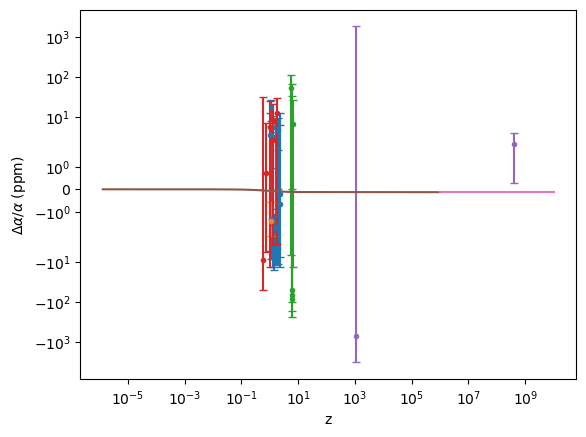

In [13]:
fig,ax = plt.subplots()

plt.errorbar(paper1['z_abs'], paper1['da/a'],
             yerr=pow(pow(paper1['stat'],2)+pow(paper1['sist'],2),0.5),
             fmt='.',capsize=3,label='paper1')
plt.errorbar(paper2['z_abs'], paper2['da/a'],
             pow(pow(paper2['stat'],2)+pow(paper2['sist'],2),0.5),
             fmt='.',capsize=3,label='paper2')
plt.errorbar(paper3['z_abs'], paper3['da/a'],
             yerr=paper3['err'],
             fmt='.',capsize=3,label='paper3')
plt.errorbar(paper4['z_abs'], paper4['da/a'],
             yerr=pow(pow(paper4['stat'],2)+pow(paper4['sist'],2),0.5),
             fmt='.',capsize=3,label='paper4')
plt.errorbar(CMB_BBN['z'], CMB_BBN['da/a'],
             yerr=CMB_BBN['err'],
             fmt='.',capsize=3,label='CMB_BBN')

alpha_em_evo_pos = alpha_em/np.exp(-tau*(phis-phis[-1]))


var_a_extra = np.linspace(pow(10,-10),pow(10,-6),1000)


phi_extra_pos = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4),
          1./(alpha+2.))

alpha_em_evo_extra_pos = alpha_em/np.exp(-tau*(phi_extra_pos-phis[-1]))

var_z_extra = 1/var_a_extra -1 # redshift list

plt.plot(var_z, (alpha_em_evo_pos-alpha_em)*pow(10,6)/alpha_em, label='1')
plt.plot(var_z_extra, (alpha_em_evo_extra_pos-alpha_em)*pow(10,6)/alpha_em, label='2')
plt.xlabel('z')
plt.ylabel('$\Delta\\alpha/\\alpha$ (ppm)')

plt.semilogx()
ax.set_yscale("symlog")
#plt.ylim(pow(10,-10),pow(10,10))
#plt.xlim(0.1,5*10**3)
#plt.ylim(-70,50)
#plt.legend()
plt.show()

In [14]:
from scipy.integrate import solve_ivp

# Parameters
c = 299792.458 #km/s
w_r = 2.469*10**(-5) #Amendola pag 15
z_star = 1089.92
alpha_em = 0.0072973525693

# Best parameters from 
M = -19.394019 # SN absolute magnitude
w_m = 0.141474
k = 38319.078247
alpha = 0.012261
tau = -5.7e-06

# Solving the differential equation sistem
def fun(a,y):
    H = np.sqrt(np.abs((k*pow(y[0],-alpha)+1.2*pow(10.,5)*
                        (w_m*pow(a,-3)+w_r*pow(a,-4)))/(12-pow(a*y[1],2))))
    dH = -(3./(2*a*H))*(pow(a*H*y[1],2)/6. + pow(10.,4)*
                        (w_m*pow(a,-3)+(4./3.)*w_r*pow(a,-4)))
    f = np.zeros(2,dtype=np.float64)
    f[0]=y[1]
    f[1]=-(4./a + dH/H)*y[1] + (alpha*0.5*k*pow(y[0],-(alpha+1)))/pow(a*H,2)
    return f

def RK4(a,h,yin):
    """
    Given the point a, the step, and the value of y in a,
    calculates the value of y in a+h
    """
    #global control
    
    k1 = fun(a,yin)
    k2 = fun(a+h/2,yin + (h/2)*k1)
    k3 = fun(a+h/2,yin + (h/2)*k2)
    k4 = fun(a+h,yin + h*k3)
    
    yout = yin + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return yout

# Initial values
a_ini = pow(10,-6)

phi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4),
          1./(alpha+2.))
dphi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4.-alpha-2.),
          1./(alpha+2.))*4./(alpha+2.)

yin = [phi, dphi]
phis = np.zeros(len(var_a))
dphis = np.zeros(len(var_a))

for i in range(len(var_a)):

    a = var_a[i]
    da = step_a[i]
    yout = RK4(a,da,yin)

    phis[i] = yout[0]
    dphis[i] = yout[1]

    yin = yout
    
alpha_em_evo = alpha_em/np.exp(-tau*(phis-phis[-1]))


var_a_extra = np.linspace(pow(10,-10),pow(10,-6),1000)


phi_extra = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4),
          1./(alpha+2.))
dphi_extra = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4.-alpha-2.),
          1./(alpha+2.))*4./(alpha+2.)

alpha_em_evo_extra = alpha_em/np.exp(-tau*(phi_extra-phis[-1]))

var_z_extra = 1/var_a_extra -1 # redshift list

In [19]:
from scipy.integrate import solve_ivp

# Parameters
c = 299792.458 #km/s
w_r = 2.469*10**(-5) #Amendola pag 15
z_star = 1089.92
alpha_em = 0.0072973525693

# Best parameters from 
M = -19.394019 # SN absolute magnitude
w_m = 0.141474
k = 38319.078247
alpha = 0.012261
tau = 5e-06

# Solving the differential equation sistem
def fun(a,y):
    H = np.sqrt(np.abs((k*pow(y[0],-alpha)+1.2*pow(10.,5)*
                        (w_m*pow(a,-3)+w_r*pow(a,-4)))/(12-pow(a*y[1],2))))
    dH = -(3./(2*a*H))*(pow(a*H*y[1],2)/6. + pow(10.,4)*
                        (w_m*pow(a,-3)+(4./3.)*w_r*pow(a,-4)))
    f = np.zeros(2,dtype=np.float64)
    f[0]=y[1]
    f[1]=-(4./a + dH/H)*y[1] + (alpha*0.5*k*pow(y[0],-(alpha+1)))/pow(a*H,2)
    return f

def RK4(a,h,yin):
    """
    Given the point a, the step, and the value of y in a,
    calculates the value of y in a+h
    """
    #global control
    
    k1 = fun(a,yin)
    k2 = fun(a+h/2,yin + (h/2)*k1)
    k3 = fun(a+h/2,yin + (h/2)*k2)
    k4 = fun(a+h,yin + h*k3)
    
    yout = yin + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return yout

# Initial values
a_ini = pow(10,-6)

phi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4),
          1./(alpha+2.))
dphi = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(a_ini,4.-alpha-2.),
          1./(alpha+2.))*4./(alpha+2.)

yin = [phi, dphi]
phis = np.zeros(len(var_a))
dphis = np.zeros(len(var_a))

for i in range(len(var_a)):

    a = var_a[i]
    da = step_a[i]
    yout = RK4(a,da,yin)

    phis[i] = yout[0]
    dphis[i] = yout[1]

    yin = yout
    
alpha_em_evo_2 = alpha_em/np.exp(-tau*(phis-phis[-1]))

phi_extra_2 = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4),
          1./(alpha+2.))
dphi_extra_2 = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4.-alpha-2.),
          1./(alpha+2.))*4./(alpha+2.)

alpha_em_evo_extra_2 = alpha_em/np.exp(-tau*(phi_extra_2-phis[-1]))

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern'})
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

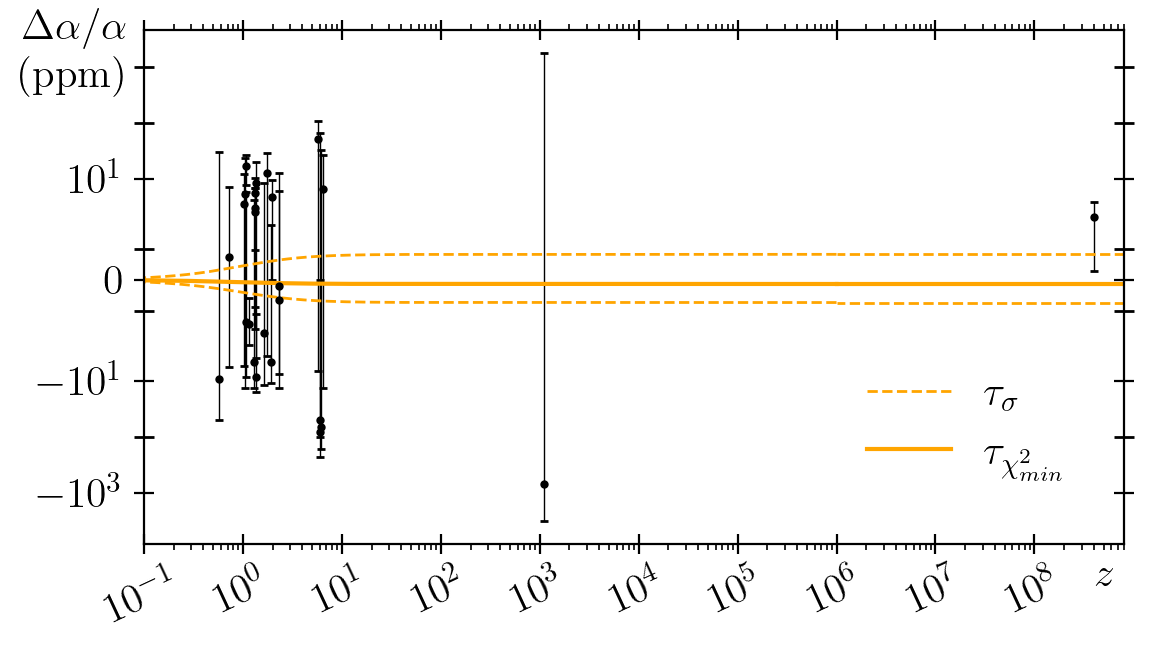

In [50]:
from matplotlib.ticker import ScalarFormatter
import matplotlib

fig,ax = plt.subplots()

fig.set_size_inches(6, 3.5)


plt.errorbar(paper1['z_abs'], paper1['da/a'],
             yerr=pow(pow(paper1['stat'],2)+pow(paper1['sist'],2),0.5),
             fmt='.',markersize=4,color='k',lw=0.5,capsize=1.5)
plt.errorbar(paper2['z_abs'], paper2['da/a'],
             pow(pow(paper2['stat'],2)+pow(paper2['sist'],2),0.5),
             fmt='.',markersize=4,color='k',lw=0.5,capsize=1.5)
plt.errorbar(paper3['z_abs'], paper3['da/a'],
             yerr=paper3['err'],
             fmt='.',markersize=4,color='k',lw=0.5,capsize=1.5)
plt.errorbar(paper4['z_abs'], paper4['da/a'],
             yerr=pow(pow(paper4['stat'],2)+pow(paper4['sist'],2),0.5),
             fmt='.',markersize=4,color='k',lw=0.5,capsize=1.5)
plt.errorbar(CMB_BBN['z'], CMB_BBN['da/a'],
             yerr=CMB_BBN['err'],
             fmt='.',markersize=4,color='k',lw=0.5,capsize=1.5)






plt.plot(var_z, (alpha_em_evo-alpha_em)*pow(10,6)/alpha_em, 'orange',label='$\\tau_{\sigma}$',linestyle='dashed',lw='1.')
plt.plot(var_z_extra, (alpha_em_evo_extra-alpha_em)*pow(10,6)/alpha_em, 'orange',linestyle='dashed',lw='1.')
plt.plot(var_z, (alpha_em_evo_2-alpha_em)*pow(10,6)/alpha_em, 'orange',linestyle='dashed',lw='1.')
plt.plot(var_z_extra, (alpha_em_evo_extra_2-alpha_em)*pow(10,6)/alpha_em, 'orange',linestyle='dashed',lw='1.')
plt.plot(var_z, (alpha_em_evo_pos-alpha_em)*pow(10,6)/alpha_em,'orange',label='$\\tau_{\chi_{min}^2}$')
plt.plot(var_z_extra, (alpha_em_evo_extra_pos-alpha_em)*pow(10,6)/alpha_em,color='orange')
plt.xlabel('$z$')
plt.ylabel('$\Delta\\alpha/\\alpha$\n(ppm)',rotation=0)

plt.semilogx()
ax.set_yscale("symlog")
ax.set_yticks([pow(-10,3),pow(-10,1),0,pow(10,1)])
ax.set_xticks([pow(10,-1),pow(10,1),pow(10,3),pow(10,5),pow(10,7)])
#plt.ylim(pow(10,-10),pow(10,10))
plt.xlim(0.1,pow(10,9))
ax.yaxis.set_label_coords(-0.07,0.87)
ax.xaxis.set_label_coords(0.98,-0.025)
ax.tick_params(direction='inout',length=7)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.ylim(-70,50)
plt.legend(bbox_to_anchor=(0.7, 0.4),
          ncol=1, frameon=False)

ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(numticks=999))
ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=999, subs="auto"))
#ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(numticks=999))

#ax.set_xticks([pow(10,-4),pow(10,-2),pow(10,0),pow(10,2),pow(10,4)])
plt.xticks(rotation = 25)

plt.xlim(pow(10,-1),0.8*pow(10,9))

ax.tick_params(axis='y', which='minor', direction='inout', length=7, width=1., labelsize=0)


fig.tight_layout()
fig.savefig('delta_alpha.pdf',bbox_inches='tight')
plt.show()

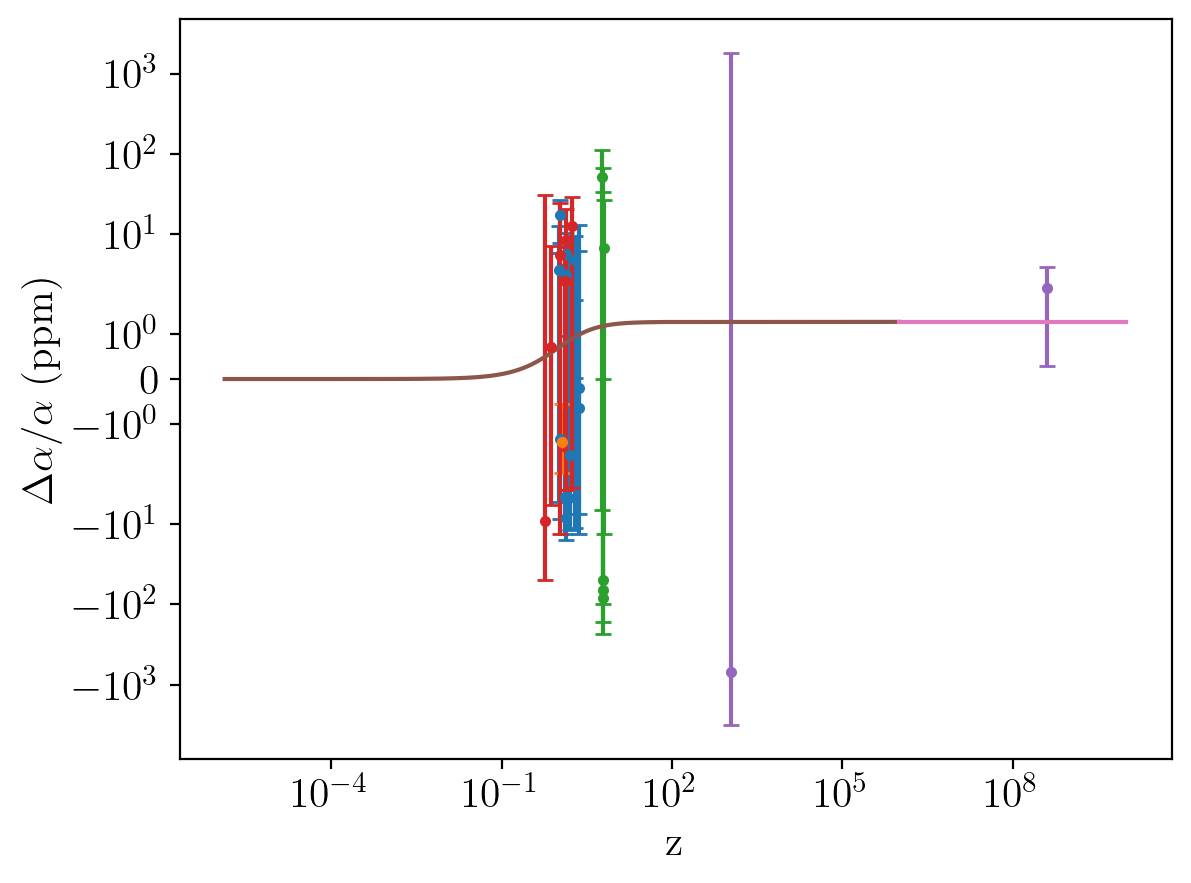

In [26]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

plt.errorbar(paper1['z_abs'], paper1['da/a'],
             yerr=pow(pow(paper1['stat'],2)+pow(paper1['sist'],2),0.5),
             fmt='.',capsize=3,label='paper1')
plt.errorbar(paper2['z_abs'], paper2['da/a'],
             pow(pow(paper2['stat'],2)+pow(paper2['sist'],2),0.5),
             fmt='.',capsize=3,label='paper2')
plt.errorbar(paper3['z_abs'], paper3['da/a'],
             yerr=paper3['err'],
             fmt='.',capsize=3,label='paper3')
plt.errorbar(paper4['z_abs'], paper4['da/a'],
             yerr=pow(pow(paper4['stat'],2)+pow(paper4['sist'],2),0.5),
             fmt='.',capsize=3,label='paper4')
plt.errorbar(CMB_BBN['z'], CMB_BBN['da/a'],
             yerr=CMB_BBN['err'],
             fmt='.',capsize=3,label='CMB_BBN')

alpha_em_evo_2 = alpha_em/np.exp(-tau*(phis-phis[-1]))


var_a_extra = np.linspace(pow(10,-10),pow(10,-6),1000)


phi_extra_2 = pow((alpha*pow(alpha+2.,2)*k/(8.*pow(10.,4)*(alpha+6.)*w_r))*pow(var_a_extra,4),
          1./(alpha+2.))


alpha_em_evo_extra_2 = alpha_em/np.exp(-tau*(phi_extra-phis[-1]))

var_z_extra = 1/var_a_extra -1 # redshift list




plt.plot(var_z, (alpha_em_evo_2-alpha_em)*pow(10,6)/alpha_em, label='1')
plt.plot(var_z_extra, (alpha_em_evo_extra_2-alpha_em)*pow(10,6)/alpha_em, label='2')
plt.xlabel('z')
plt.ylabel('$\Delta\\alpha/\\alpha$ (ppm)')

plt.semilogx()
ax.set_yscale("symlog")
#plt.ylim(pow(10,-10),pow(10,10))
#plt.xlim(0.1,5*10**3)
#plt.ylim(-70,50)
#plt.legend()
plt.show()

[]

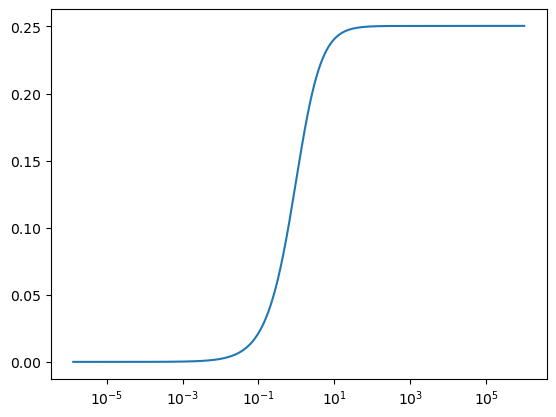

In [53]:
plt.plot(var_z, (alpha_em_evo-alpha_em)*pow(10,6)/alpha_em, label='1')
plt.semilogx()